Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas_profiling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [60]:
data = pd.read_csv('taxi.csv')

In [63]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [62]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [65]:
data.order_gk.nunique()

81435

Пропущенных данных нет, но в столбцах distance_km, duration_min, driver_latitude, driver_longitude,
origin_order_latitude, origin_order_longitude минимальное значение равно -1, что скорей всего означает отсутствие информации.
Данные в столбцах offer_gk, driver_gk и order_gk нам не пригодятся, так как показывают просто айдишникизаявки, водителя и заказа

In [66]:
data.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

Текстовый столбец offer_class_group имеет 9 уникальных значений

In [67]:
data.ride_type_desc.value_counts()

private      91207
business      8533
affiliate      224
SMB             36
Name: ride_type_desc, dtype: int64

Текстовый столбец ride_type_desc имеет 4 уникальных значения

Посмотрим, сколько значений у нас отсутствует (равны -1)

In [68]:
data[(data.distance_km == -1) | (data.duration_min == -1) | (data.driver_latitude == -1) | (data.driver_longitude == -1) | (data.origin_order_latitude == -1) | (data.origin_order_longitude == -1)]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,1088748,1,2,2442,458538,55.961383,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99987,871592,4,23,2442,802677,55.961121,37.414019,55.961995,37.406355,-1.0,-1.0,Standard,private,0
99991,619039,6,23,2442,323136,55.961239,37.413497,55.962322,37.407117,-1.0,-1.0,Standard,private,0


Получилось 26236 строк, придется их удалить

In [69]:
data = data[~((data.distance_km == -1) | (data.duration_min == -1) | (data.driver_latitude == -1) | (data.driver_longitude == -1) | (data.origin_order_latitude == -1) | (data.origin_order_longitude == -1))]

In [70]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,7.376400e+04,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000,73764.000000
mean,5.657813e+05,3.150277,13.800770,3461.403557,461943.905238,55.780046,37.545993,55.780141,37.546164,25.276109,31.702118,0.471626
std,3.262776e+05,2.078243,7.316096,2038.999686,266093.682962,0.258694,0.211656,0.159564,0.163075,45.954422,35.725641,0.499198
min,4.000000e+00,0.000000,0.000000,14.000000,27.000000,0.000000,0.000000,55.342523,36.994072,0.000000,0.000000,0.000000
25%,2.848948e+05,1.000000,8.000000,1421.000000,230752.750000,55.705835,37.413468,55.705634,37.407117,7.901000,16.567000,0.000000
50%,5.648260e+05,3.000000,16.000000,3507.000000,463115.500000,55.774828,37.528466,55.775037,37.527378,18.605000,28.183000,0.000000
75%,8.495752e+05,5.000000,20.000000,5246.000000,692512.000000,55.961102,37.625656,55.962322,37.625480,38.735000,44.337250,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.018542,38.232760,56.025061,38.204119,5234.283000,3958.283000,1.000000


In [71]:
# удаляем столбцы offer_gk, driver_gk и order_gk

data.drop(['offer_gk', 'driver_gk', 'order_gk'], axis=1, inplace=True)

In [72]:
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,6,15,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
7,5,20,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0


In [73]:
data.offer_class_group.value_counts()

Economy     40817
Standard    29913
Premium      1010
Delivery      888
Kids          569
XL            448
VIP           108
VIP+           11
Name: offer_class_group, dtype: int64

После удаления данных у нас осталось 8 уникальных значений offer_class_group и 3 уникальных значения ride_type_desc

In [74]:
data.ride_type_desc.value_counts()

private     73592
business      153
SMB            19
Name: ride_type_desc, dtype: int64

Посмотрим на корреляцию признаков между собой

In [75]:
corr_matrix = data.corr()

<AxesSubplot:>

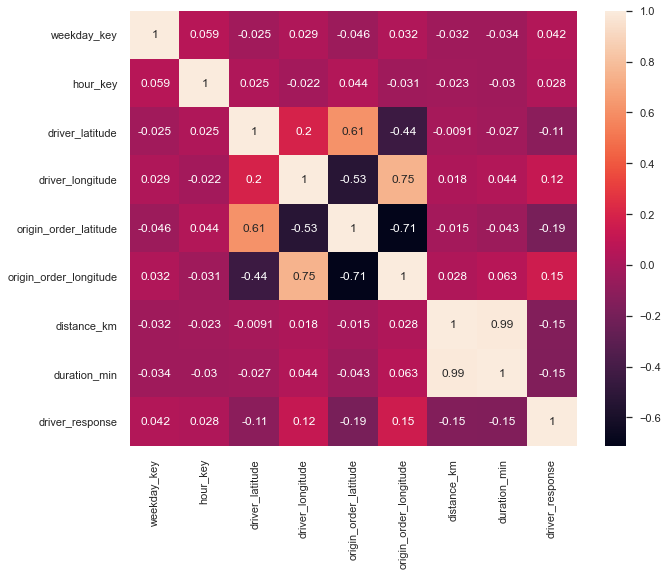

In [76]:
sns.set(rc = ({'figure.figsize':(10, 8)}))
sns.heatmap(corr_matrix, annot = True, 
            xticklabels = corr_matrix.columns.values, 
            yticklabels = corr_matrix.columns.values)

Между driver_longitude и origin_order_longitude есть заметная корреляция

Преобразуем категориальные признаки (offer_class_group, ride_type_desc) с помощью OneHotEncoder

In [77]:
oh_enc = OneHotEncoder()

In [78]:
offer_class_group_features = oh_enc.fit_transform(data[['offer_class_group']]).toarray()
offer_class_group_features = pd.DataFrame(offer_class_group_features, columns = oh_enc.categories_[0])
offer_class_group_features.head()

,Delivery,Economy,Kids,Premium,Standard,VIP,VIP+,XL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
ride_type_desc_features = oh_enc.fit_transform(data[['ride_type_desc']]).toarray()
ride_type_desc_features = pd.DataFrame(ride_type_desc_features, columns = oh_enc.categories_[0])
ride_type_desc_features.head()

,SMB,business,private
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


Объединим данные

In [80]:
data = data.reset_index(drop=True)
data.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
1,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
2,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
3,6,15,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
4,5,20,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73764 entries, 0 to 73763
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekday_key             73764 non-null  int64  
 1   hour_key                73764 non-null  int64  
 2   driver_latitude         73764 non-null  float64
 3   driver_longitude        73764 non-null  float64
 4   origin_order_latitude   73764 non-null  float64
 5   origin_order_longitude  73764 non-null  float64
 6   distance_km             73764 non-null  float64
 7   duration_min            73764 non-null  float64
 8   offer_class_group       73764 non-null  object 
 9   ride_type_desc          73764 non-null  object 
 10  driver_response         73764 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 6.2+ MB


In [86]:
data = data.join(offer_class_group_features)
data.drop(['offer_class_group'], axis=1, inplace=True)
data.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,SMB,business,private,Delivery,Economy,Kids,Premium,Standard,VIP,VIP+,XL
0,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,15,55.818963,37.361033,55.814827,37.354074,6.747,9.800,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,20,55.839318,37.248862,55.839134,37.304101,1.517,3.933,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73764 entries, 0 to 73763
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekday_key             73764 non-null  int64  
 1   hour_key                73764 non-null  int64  
 2   driver_latitude         73764 non-null  float64
 3   driver_longitude        73764 non-null  float64
 4   origin_order_latitude   73764 non-null  float64
 5   origin_order_longitude  73764 non-null  float64
 6   distance_km             73764 non-null  float64
 7   duration_min            73764 non-null  float64
 8   offer_class_group       73764 non-null  object 
 9   ride_type_desc          73764 non-null  object 
 10  driver_response         73764 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 6.2+ MB


In [83]:
data = data.join(ride_type_desc_features)
data.drop(['ride_type_desc'], axis=1, inplace=True)
data.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,driver_response,SMB,business,private
0,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,1,0.0,0.0,1.0
1,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,0,0.0,0.0,1.0
2,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,1,0.0,0.0,1.0
3,6,15,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,0,0.0,0.0,1.0
4,5,20,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,0,0.0,0.0,1.0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73764 entries, 0 to 73763
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekday_key             73764 non-null  int64  
 1   hour_key                73764 non-null  int64  
 2   driver_latitude         73764 non-null  float64
 3   driver_longitude        73764 non-null  float64
 4   origin_order_latitude   73764 non-null  float64
 5   origin_order_longitude  73764 non-null  float64
 6   distance_km             73764 non-null  float64
 7   duration_min            73764 non-null  float64
 8   offer_class_group       73764 non-null  object 
 9   driver_response         73764 non-null  int64  
 10  SMB                     73764 non-null  float64
 11  business                73764 non-null  float64
 12  private                 73764 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 7.3+ MB


Нормализуем данные:

In [87]:
bool_cols = ['Delivery', 'Economy', 'Kids', 'Premium', 'Premium', 'Standard', 'VIP', 'VIP+', 'XL', 'SMB', 'business', 'private']
real_vars = data.drop(bool_cols + ['driver_response'], axis=1)
cat_vars = data[bool_cols]

y = data['driver_response']

In [88]:
mm_scaler = MinMaxScaler()
mm_scaled_real_vars = mm_scaler.fit_transform(real_vars)
mm_scaled_real_vars = pd.DataFrame(mm_scaled_real_vars, columns=real_vars.columns)
mm_scaled_real_vars.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min
0,0.833333,0.608696,0.996194,0.981227,0.698578,0.390337,0.003592,0.006371
1,1.000000,0.608696,0.996348,0.976850,0.691982,0.297511,0.001289,0.002476
2,0.666667,0.695652,0.996163,0.981399,0.688659,0.440756,0.002366,0.004863
3,1.000000,0.652174,0.996437,0.977199,0.691982,0.297511,0.001289,0.002476
4,0.833333,0.869565,0.996801,0.974266,0.727595,0.256212,0.000290,0.000994


In [89]:
X_mm = mm_scaled_real_vars.join(cat_vars)

In [90]:
#  делим данные на тренировочные и тестовые

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_mm, 
    y, 
    test_size = 0.2
)

In [53]:
rand_state = 10

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

Используем модель RandomForest

In [91]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


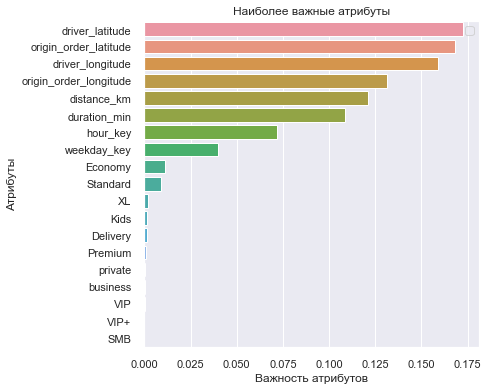

In [92]:
# посмотрим наиболее важные атрибуты для модели 

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Для принятия водителем заказа важными показателями являются его местоположение, местоположение заказа и дистанция.

In [93]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      7851
           1       0.74      0.81      0.78      6902

    accuracy                           0.78     14753
   macro avg       0.78      0.78      0.78     14753
weighted avg       0.78      0.78      0.78     14753



0.7805192164305566